In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import healpy as hp
import time
import matplotlib.pyplot as plt
%matplotlib inline      # To display the plots inside the Jupyter Notebook

UsageError: unrecognized arguments: # To display the plots inside the Jupyter Notebook


In [2]:


#Reading the CSV file
df=pd.read_csv("/home/sonia/PRATUSH/ACMA_FM_Tx.csv")


In [3]:
#Cleaning and Formatting the CSV file
df[['Deg','Min','Sec']] = df.Latitude.str.split(expand=True) # Splitting the column: Latitude into three new columns : Deg,Min and Sec respectively
df['Sec']= df.Sec.str.replace('S,?' , '') #Removing the letter 'S' 
df[['Deg','Min','Sec']]= df[['Deg','Min','Sec']].astype(int) # Converting from string to integer
df[['Deg1','Min1','Sec1']] = df.Longitude.str.split(expand=True) # Splitting the column: Longitude into three new columns : Deg,Min and Sec respectively
df['Sec1']= df.Sec1.str.replace('E,?' , '') #Removing the letter 'E' 
df[['Deg1','Min1','Sec1']]= df[['Deg1','Min1','Sec1']].astype(int) # Converting from string to integer

<ipython-input-3-ec3b34bb90a7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sec']= df.Sec.str.replace('S,?' , '') #Removing the letter 'S'
<ipython-input-3-ec3b34bb90a7>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sec1']= df.Sec1.str.replace('E,?' , '') #Removing the letter 'E'


In [4]:
#Convert degrees,minutes,seconds to decimal degrees where decimal degrees = degrees + minutes/60 + seconds/3600
df['Latitude in degrees']= df['Deg']+ df['Min'].div(60)+ df['Sec'].div(3600)
df['Longitude in degrees']= df['Deg1']+ df['Min1'].div(60)+ df['Sec1'].div(3600)

In [5]:
#print the dataframe
df.head()

,Area Served,Callsign,Frequency(MHz),Purpose,Polarisation,Antenna Height (m),Antenna Pattern,Maximum ERP (W),Technical Specification Number,Licence Number,...,Licence Area ID,Status,Deg,Min,Sec,Deg1,Min1,Sec1,Latitude in degrees,Longitude in degrees
0,Adelaide,5ADL,91.9,Commercial,M,60,DA,20000.0,10010794,1170890,...,NaN,Issued,34,58,44,138,42,31,34.978889,138.708611
1,Adelaide,5FBI,92.7,Community,M,45,DA,20000.0,3371001,1170715,...,NaN,Issued,34,58,48,138,42,28,34.980000,138.707778
2,Adelaide,5DDD,93.7,Community,M,45,OD,6300.0,3076001,1385198,...,NaN,Issued,34,58,48,138,42,28,34.980000,138.707778
3,Adelaide,5UV,101.5,Community,M,60,DA,20000.0,6457001,1156865,...,NaN,Issued,34,58,44,138,42,31,34.978889,138.708611
4,Adelaide,5ADD,102.3,Commercial,M,60,DA,20000.0,4191001,1911525,...,NaN,Issued,34,58,57,138,42,30,34.982500,138.708333


In [6]:
#Resolution of the map
nside = 512
print("Approximate resolution in degrees for given nside: " + str(np.degrees(hp.nside2resol(nside))))
print("The number of pixels for the given nside: " + str(hp.nside2npix(nside)))
print( "Pixel area: %.2f square degrees" % hp.nside2pixarea(nside, degrees=True))

Approximate resolution in degrees for given nside: 0.11451621372724687
The number of pixels for the given nside: 3145728
Pixel area: 0.01 square degrees


In [7]:
# Healpy pixel number when input angles are assumed to be longitude and latitude in degree
pixel_indices = hp.ang2pix(nside, df['Longitude in degrees'].to_numpy() ,df['Latitude in degrees'].to_numpy(), lonlat=True)
print(pixel_indices)

[669461 669461 669461 ... 902889 902889 868177]


In [8]:
data = np.zeros(hp.nside2npix(nside))  #creating an empty array
point= np.arange(2665) # creating an array of data points
data[pixel_indices]=point 
data[pixel_indices]

array([  16.,   16.,   16., ..., 2663., 2663., 2664.])

/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/sonia/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a 

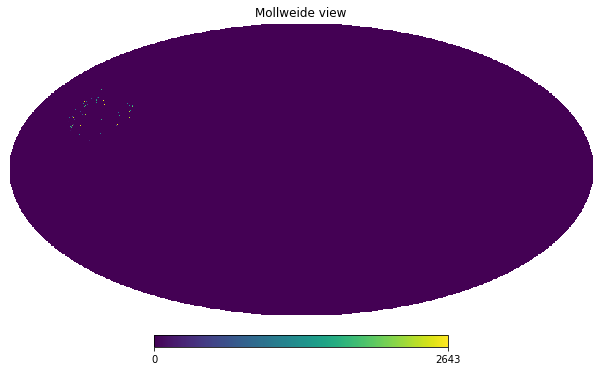

In [9]:
#Plot a healpix map (given as an array) in Mollweide projection
hp.mollview(data)

In [10]:
#Creating user defined spacing between 400 km to 36000 km in log scale
step=np.int(input("Enter your value in km : "))
height= np.logspace(np.log10(400),np.log10(36000),step) 
print(height)

<ipython-input-10-854b25696163>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  step=np.int(input("Enter your value in km : "))


Enter your value in km : 10
[  400.           659.47456174  1087.26674394  1792.56189862
  2955.37243119  4872.48234707  8033.19540099 13244.220041
 21835.56551766 36000.        ]


In [11]:
#Converting ERP[ in Watts] to EIRP[ in Watts]
df['EIRP']=1.64 * df['Maximum ERP (W)']

In [12]:
#Calculating the received power using the Friis Transmission Equation
Rx_Power= np.zeros((len(df),len(height)))


for i in range(0,len(height)):
    for j in range(0,len(df)):
        wavelength= (3*1e8)/(df.iloc[j]['Frequency(MHz)']*1e6)
        Rx_Power[j][i]= ((df.iloc[j]['EIRP'])*(wavelength)**2)/(4*np.pi*height[i])**2 #he Friis Transmission Equation
Rx_Power_dBm=10.*np.log10(Rx_Power)+30 #in dBm
Rx_Power

array([[1.38339315e-02, 5.08943423e-03, 1.87237741e-03, ...,
        1.26186480e-05, 4.64233754e-06, 1.70789277e-06],
       [1.35961884e-02, 5.00196975e-03, 1.84019967e-03, ...,
        1.24017902e-05, 4.56255664e-06, 1.67854178e-06],
       [4.19187202e-03, 1.54216876e-03, 5.67356178e-04, ...,
        3.82362438e-06, 1.40669230e-06, 5.17515064e-07],
       ...,
       [1.12079235e-04, 4.12333903e-05, 1.51695582e-05, ...,
        1.02233297e-07, 3.76111188e-08, 1.38369426e-08],
       [2.10741417e-04, 7.75307138e-05, 2.85231621e-05, ...,
        1.92228202e-07, 7.07197945e-08, 2.60174589e-08],
       [1.45858107e-05, 5.36604683e-06, 1.97414181e-06, ...,
        1.33044762e-08, 4.89465027e-09, 1.80071737e-09]])

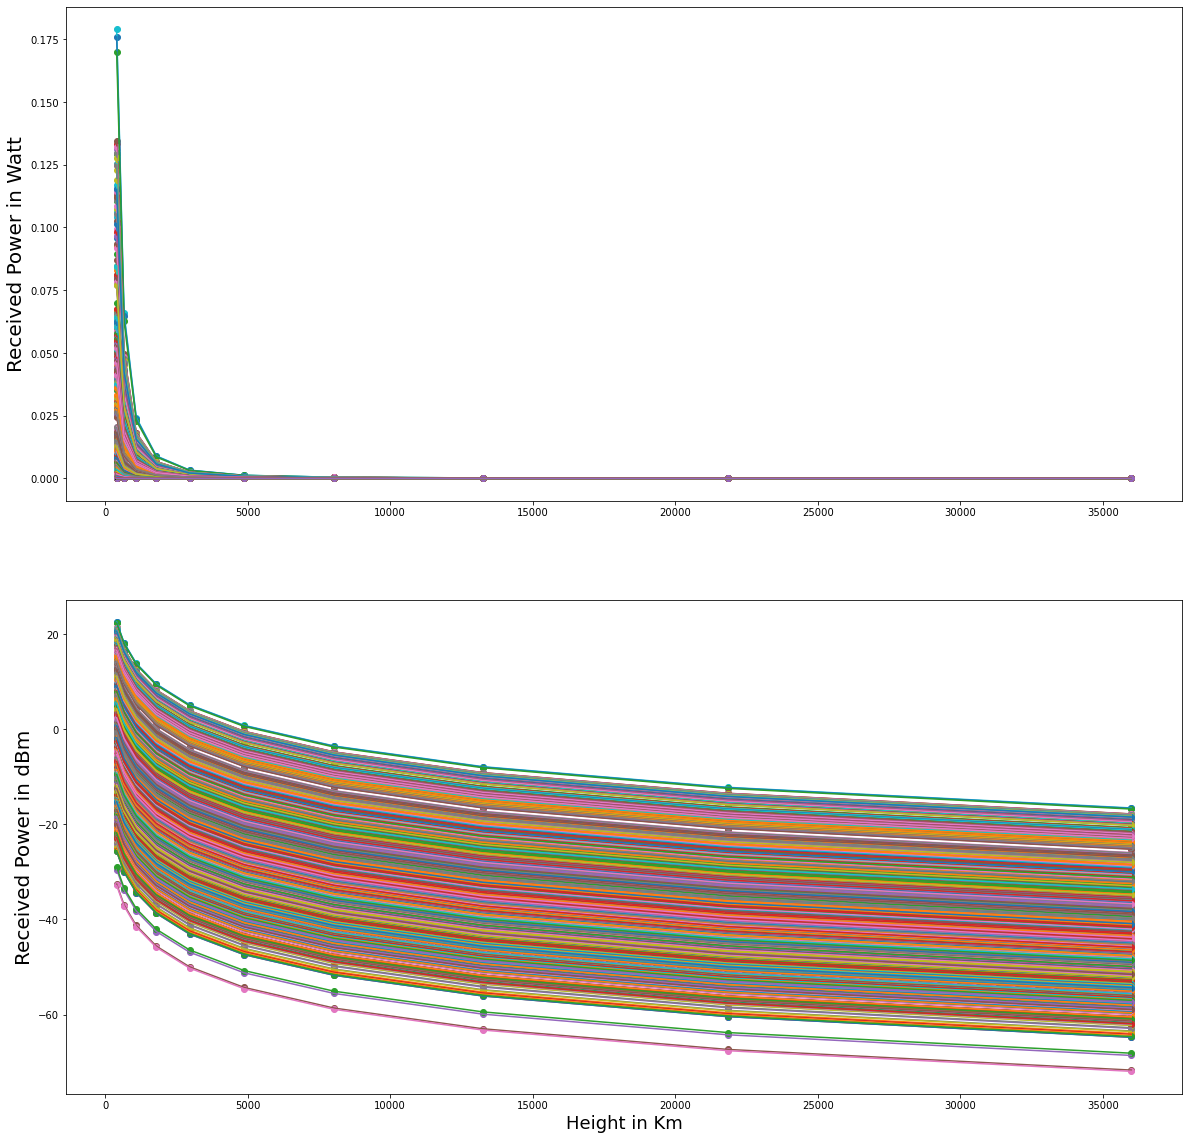

In [20]:

fig,axs=plt.subplots(2,1,figsize=(20,20))
axs[1].set_xlabel("Height in Km",fontsize=18)
axs[0].set_ylabel("Received Power in Watt",fontsize=20)
axs[1].set_ylabel("Received Power in dBm",fontsize=20)

for i in range(0,len(df)):
    axs[0].plot(height,Rx_Power[i])
    axs[0].scatter(height,Rx_Power[i])
    axs[1].plot(height,Rx_Power_dBm[i])
    axs[1].scatter(height,Rx_Power_dBm[i])
    

plt.show()